In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [1]:
df1 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_1_df.csv")
df2 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_2_df.csv")
df3 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_3_df.csv")
df4 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_4_df.csv")
df5 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_5_df.csv")
df6 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_6_df.csv")
df7 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_7_df.csv")
df8 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_8_df.csv")

df = pd.concat([df1, df2, df3, df4, df4, df5, df6, df7, df8], ignore_index=True)
df.head()

NameError: name 'pd' is not defined

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8779 entries, 0 to 8778
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8779 non-null   int64  
 1   0           5415 non-null   object 
 2   1           8779 non-null   object 
 3   2           8779 non-null   object 
 4   3           8779 non-null   float64
 5   4           7910 non-null   object 
 6   5           8779 non-null   bool   
 7   6           8779 non-null   object 
 8   7           2391 non-null   object 
 9   8           8779 non-null   object 
 10  9           8779 non-null   object 
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 694.6+ KB


In [120]:
df = df.drop(['Unnamed: 0'], axis=1)

In [121]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 8770
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       302 non-null    object 
 1   1       499 non-null    object 
 2   2       499 non-null    object 
 3   3       499 non-null    float64
 4   4       446 non-null    object 
 5   5       499 non-null    bool   
 6   6       499 non-null    object 
 7   7       134 non-null    object 
 8   8       499 non-null    object 
 9   9       499 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 39.5+ KB


In [122]:
df.rename(columns={'0': 'JobTitle', '1': 'Company', '2': 'Location', '3': 'CompanyRating', '4': 'Salary', '5': 'Remote', '6':'Urgent', '7': 'EasilyApply', '8':'PostedDate', '9': 'ExtractDate' }, inplace=True)

In [123]:
df

JobTitle                             Company  \
0     Data Scientist                             Spotify   
15    Data Scientist              NYC Health + Hospitals   
30    Data Scientist                          CVS Health   
45    Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60    Data Scientist                              PayPal   
...              ...                                 ...   
8695  Data Scientist                            Deloitte   
8725             NaN                             Walmart   
8740             NaN                           New Relic   
8755             NaN                       TRC Companies   
8770             NaN                                KPMG   

                                               Location  CompanyRating  \
0                                   New York, NY•Remote            4.3   
15    New York, NY 10004 (Financial District area)+3...            3.8   
30                             New York, NY+4 locations            3.2   
45                                        Manhattan, NY            3.6   
60                    New York, NY 10013 (Tribeca area)            3.9   
...                                                 ...            ...   
8695                                       New York, NY            4.0   
8725                                  Hoboken, NJ 07030            3.5   
8740  New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                           New Providence, NJ 07974            3.7   
8770                            New York, NY+1 location            3.9   

                               Salary  Remote           Urgent  \
0     Estimated $96.1K – $122K a year    True       Not Urgent   
15          $63,926 - $120,000 a year    True       Not Urgent   
30            $82,400 a yearFull-time    True       Not Urgent   
45          $40,883 - $135,440 a year    True       Not Urgent   
60                $110 - $130 an hour    True  Urgently hiring   
...                               ...     ...              ...   
8695   Estimated $147K – $186K a year    True       Not Urgent   
8725                              NaN    True       Not Urgent   
8740   Estimated $125K – $159K a year    True       Not Urgent   
8755     Estimated $45K – $57K a year    True       Not Urgent   
8770                        Full-time   False       Not Urgent   

                          EasilyApply                PostedDate ExtractDate  
0                        Easily apply        Posted30+ days ago  2022-01-23  
15                       Easily apply         Posted22 days ago  2022-01-23  
30                                NaN               PostedToday  2022-01-23  
45                                NaN        Posted30+ days ago  2022-01-23  
60    Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23  
...                               ...                       ...         ...  
8695                     Easily apply        Posted30+ days ago  2022-01-23  
8725                              NaN          Posted4 days ago  2022-01-23  
8740                              NaN        Posted30+ days ago  2022-01-23  
8755                              NaN        Posted30+ days ago  2022-01-23  
8770                              NaN        Posted30+ days ago  2022-01-23  

[499 rows x 10 columns]

In [82]:
df.index.name= 'JobNum'
df.JobTitle.fillna('Data Scientist', inplace=True)

In [83]:
df

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
15      Data Scientist              NYC Health + Hospitals   
30      Data Scientist                          CVS Health   
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60      Data Scientist                              PayPal   
...                ...                                 ...   
8695    Data Scientist                            Deloitte   
8725    Data Scientist                             Walmart   
8740    Data Scientist                           New Relic   
8755    Data Scientist                       TRC Companies   
8770    Data Scientist                                KPMG   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
30                               New York, NY+4 locations            3.2   
45                                          Manhattan, NY            3.6   
60                      New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
8695                                         New York, NY            4.0   
8725                                    Hoboken, NJ 07030            3.5   
8740    New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                             New Providence, NJ 07974            3.7   
8770                              New York, NY+1 location            3.9   

                                 Salary  Remote           Urgent  \
JobNum                                                             
0       Estimated $96.1K – $122K a year    True       Not Urgent   
15            $63,926 - $120,000 a year    True       Not Urgent   
30              $82,400 a yearFull-time    True       Not Urgent   
45            $40,883 - $135,440 a year    True       Not Urgent   
60                  $110 - $130 an hour    True  Urgently hiring   
...                                 ...     ...              ...   
8695     Estimated $147K – $186K a year    True       Not Urgent   
8725                                NaN    True       Not Urgent   
8740     Estimated $125K – $159K a year    True       Not Urgent   
8755       Estimated $45K – $57K a year    True       Not Urgent   
8770                          Full-time   False       Not Urgent   

                            EasilyApply                PostedDate ExtractDate  
JobNum                                                                         
0                          Easily apply        Posted30+ days ago  2022-01-23  
15                         Easily apply         Posted22 days ago  2022-01-23  
30                                  NaN               PostedToday  2022-01-23  
45                                  NaN        Posted30+ days ago  2022-01-23  
60      Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23  
...                                 ...                       ...         ...  
8695                       Easily apply        Posted30+ days ago  2022-01-23  
8725                                NaN          Posted4 days ago  2022-01-23  
8740                                NaN        Posted30+ days ago  2022-01-23  
8755                                NaN        Posted30+ days ago  2022-01-23  
8770                                NaN        Posted30+ days ago  2022-01-23  

[499 rows x 10 columns]

In [84]:
df.to_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/nyc_df.csv")

In [85]:
extracted_salary = df['Salary'].str.extract('(\d+)').astype(float)
df['ExtractedSalary'] = extracted_salary
post_age = df['PostedDate'].str.extract('(\d+)').astype(float)
df['PostAge'] = post_age

In [86]:
df

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
15      Data Scientist              NYC Health + Hospitals   
30      Data Scientist                          CVS Health   
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60      Data Scientist                              PayPal   
...                ...                                 ...   
8695    Data Scientist                            Deloitte   
8725    Data Scientist                             Walmart   
8740    Data Scientist                           New Relic   
8755    Data Scientist                       TRC Companies   
8770    Data Scientist                                KPMG   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
30                               New York, NY+4 locations            3.2   
45                                          Manhattan, NY            3.6   
60                      New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
8695                                         New York, NY            4.0   
8725                                    Hoboken, NJ 07030            3.5   
8740    New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                             New Providence, NJ 07974            3.7   
8770                              New York, NY+1 location            3.9   

                                 Salary  Remote           Urgent  \
JobNum                                                             
0       Estimated $96.1K – $122K a year    True       Not Urgent   
15            $63,926 - $120,000 a year    True       Not Urgent   
30              $82,400 a yearFull-time    True       Not Urgent   
45            $40,883 - $135,440 a year    True       Not Urgent   
60                  $110 - $130 an hour    True  Urgently hiring   
...                                 ...     ...              ...   
8695     Estimated $147K – $186K a year    True       Not Urgent   
8725                                NaN    True       Not Urgent   
8740     Estimated $125K – $159K a year    True       Not Urgent   
8755       Estimated $45K – $57K a year    True       Not Urgent   
8770                          Full-time   False       Not Urgent   

                            EasilyApply                PostedDate ExtractDate  \
JobNum                                                                          
0                          Easily apply        Posted30+ days ago  2022-01-23   
15                         Easily apply         Posted22 days ago  2022-01-23   
30                                  NaN               PostedToday  2022-01-23   
45                                  NaN        Posted30+ days ago  2022-01-23   
60      Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23   
...                                 ...                       ...         ...   
8695                       Easily apply        Posted30+ days ago  2022-01-23   
8725                                NaN          Posted4 days ago  2022-01-23   
8740                                NaN        Posted30+ days ago  2022-01-23   
8755                                NaN        Posted30+ days ago  2022-01-23   
8770                                NaN        Posted30+ days ago  2022-01-23   

        ExtractedSalary  PostAge  
JobNum                            
0                  96.0     30.0  
15                 63.0     22.0  
30                 82.0      NaN  
45                 40.0     30.0  
60                110.0      1.0  
...                 ...      ...  

In [87]:
median_salary = df.ExtractedSalary.median()
print(median_salary)

98.5


In [88]:
age_post_median = df.PostAge.median()
print(age_post_median)

30.0


In [89]:
df.PostAge.fillna(30.0, inplace=True)

In [90]:
df.EasilyApply.fillna(0, inplace=True)

In [91]:
df[df.EasilyApply != 0]

JobTitle                  Company  \
JobNum                                            
0       Data Scientist                  Spotify   
15      Data Scientist   NYC Health + Hospitals   
60      Data Scientist                   PayPal   
75      Data Scientist                   Twitch   
195     Data Scientist  Amazon.com Services LLC   
...                ...                      ...   
8275    Data Scientist          Productive Edge   
8455    Data Scientist                  Peloton   
8545    Data Scientist                  Bitfury   
8575    Data Scientist                     Sift   
8695    Data Scientist                 Deloitte   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
60                      New York, NY 10013 (Tribeca area)            3.9   
75                                New York, NY+1 location            4.4   
195                                          New York, NY            3.5   
...                                                   ...            ...   
8275               New York, NY 10014 (West Village area)            3.0   
8455                                         New York, NY            3.3   
8545                                  New York, NY•Remote            3.3   
8575                                         New York, NY            4.3   
8695                                         New York, NY            4.0   

                                                   Salary  Remote  \
JobNum                                                              
0                         Estimated $96.1K – $122K a year    True   
15                              $63,926 - $120,000 a year    True   
60                                    $110 - $130 an hour    True   
75                                              Full-time    True   
195     $80,000 - $100,000 a yearFull-time +18 hour shift    True   
...                                                   ...     ...   
8275                           $200,000 - $300,000 a year    True   
8455                      Estimated $83.6K – $106K a year   False   
8545                     Estimated $78.5K – $99.3K a year    True   
8575                       Estimated $106K – $134K a year    True   
8695                       Estimated $147K – $186K a year    True   

                 Urgent                      EasilyApply  \
JobNum                                                     
0            Not Urgent                     Easily apply   
15           Not Urgent                     Easily apply   
60      Urgently hiring  Easily applyResponsive employer   
75           Not Urgent                     Easily apply   
195     Urgently hiring      Easily applyUrgently hiring   
...                 ...                              ...   
8275         Not Urgent                     Easily apply   
8455         Not Urgent                     Easily apply   
8545         Not Urgent                     Easily apply   
8575         Not Urgent                     Easily apply   
8695         Not Urgent                     Easily apply   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
15             Posted22 days ago  2022-01-23             63.0     22.0  
60      EmployerActive 1 day ago  2022-01-23            110.0      1.0  
75            Posted30+ days ago  2022-01-23              NaN     30.0  
195     EmployerActive 1 day ago  2022-01-23             80.0      1.0  
...                          ...         ...              ...      ...  
8275          Posted30+ days ago  2022-01-23            200.0     30.0  
8455           Posted16 d

In [92]:
df = df.replace(to_replace = ['Easily apply', 'Easily applyUrgently hiring', 'Easily applyResponsive employer'], value=1)

In [93]:
df

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
15      Data Scientist              NYC Health + Hospitals   
30      Data Scientist                          CVS Health   
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60      Data Scientist                              PayPal   
...                ...                                 ...   
8695    Data Scientist                            Deloitte   
8725    Data Scientist                             Walmart   
8740    Data Scientist                           New Relic   
8755    Data Scientist                       TRC Companies   
8770    Data Scientist                                KPMG   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
30                               New York, NY+4 locations            3.2   
45                                          Manhattan, NY            3.6   
60                      New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
8695                                         New York, NY            4.0   
8725                                    Hoboken, NJ 07030            3.5   
8740    New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                             New Providence, NJ 07974            3.7   
8770                              New York, NY+1 location            3.9   

                                 Salary  Remote           Urgent EasilyApply  \
JobNum                                                                         
0       Estimated $96.1K – $122K a year    True       Not Urgent           1   
15            $63,926 - $120,000 a year    True       Not Urgent           1   
30              $82,400 a yearFull-time    True       Not Urgent           0   
45            $40,883 - $135,440 a year    True       Not Urgent           0   
60                  $110 - $130 an hour    True  Urgently hiring           1   
...                                 ...     ...              ...         ...   
8695     Estimated $147K – $186K a year    True       Not Urgent           1   
8725                                NaN    True       Not Urgent           0   
8740     Estimated $125K – $159K a year    True       Not Urgent           0   
8755       Estimated $45K – $57K a year    True       Not Urgent           0   
8770                          Full-time   False       Not Urgent           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
15             Posted22 days ago  2022-01-23             63.0     22.0  
30                   PostedToday  2022-01-23             82.0     30.0  
45            Posted30+ days ago  2022-01-23             40.0     30.0  
60      EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
8695          Posted30+ days ago  2022-01-23            147.0     30.0  
8725            Posted4 days ago  2022-01-23              NaN      4.0  
8740          Posted30+ days ago  2022-01-23            125.0     30.0  
8755          Posted30+ days ago  2022-01-23             45.0     30.0  
8770          Posted30+ days ago  2022-01-23              NaN     30.0  

[499 rows x 12 columns]

In [94]:
df = df.replace(to_replace = ['Not Urgent'], value=0)

In [95]:
df = df.replace(to_replace = ['Urgently hiring'], value=1)

In [96]:
df

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
15      Data Scientist              NYC Health + Hospitals   
30      Data Scientist                          CVS Health   
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60      Data Scientist                              PayPal   
...                ...                                 ...   
8695    Data Scientist                            Deloitte   
8725    Data Scientist                             Walmart   
8740    Data Scientist                           New Relic   
8755    Data Scientist                       TRC Companies   
8770    Data Scientist                                KPMG   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
30                               New York, NY+4 locations            3.2   
45                                          Manhattan, NY            3.6   
60                      New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
8695                                         New York, NY            4.0   
8725                                    Hoboken, NJ 07030            3.5   
8740    New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                             New Providence, NJ 07974            3.7   
8770                              New York, NY+1 location            3.9   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year    True       0           1   
15            $63,926 - $120,000 a year    True       0           1   
30              $82,400 a yearFull-time    True       0           0   
45            $40,883 - $135,440 a year    True       0           0   
60                  $110 - $130 an hour    True       1           1   
...                                 ...     ...     ...         ...   
8695     Estimated $147K – $186K a year    True       0           1   
8725                                NaN    True       0           0   
8740     Estimated $125K – $159K a year    True       0           0   
8755       Estimated $45K – $57K a year    True       0           0   
8770                          Full-time   False       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
15             Posted22 days ago  2022-01-23             63.0     22.0  
30                   PostedToday  2022-01-23             82.0     30.0  
45            Posted30+ days ago  2022-01-23             40.0     30.0  
60      EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
8695          Posted30+ days ago  2022-01-23            147.0     30.0  
8725            Posted4 days ago  2022-01-23              NaN      4.0  
8740          Posted30+ days ago  2022-01-23            125.0     30.0  
8755          Posted30+ days ago  2022-01-23             45.0     30.0  
8770          Posted30+ days ago  2022-01-23              NaN     30.0  

[499 rows x 12 columns]

In [97]:
df = df.replace({'Remote': {True: 1}})

In [98]:
df = df.replace({'Remote': {False: 0}})

In [99]:
df

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
15      Data Scientist              NYC Health + Hospitals   
30      Data Scientist                          CVS Health   
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60      Data Scientist                              PayPal   
...                ...                                 ...   
8695    Data Scientist                            Deloitte   
8725    Data Scientist                             Walmart   
8740    Data Scientist                           New Relic   
8755    Data Scientist                       TRC Companies   
8770    Data Scientist                                KPMG   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
30                               New York, NY+4 locations            3.2   
45                                          Manhattan, NY            3.6   
60                      New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
8695                                         New York, NY            4.0   
8725                                    Hoboken, NJ 07030            3.5   
8740    New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                             New Providence, NJ 07974            3.7   
8770                              New York, NY+1 location            3.9   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year       1       0           1   
15            $63,926 - $120,000 a year       1       0           1   
30              $82,400 a yearFull-time       1       0           0   
45            $40,883 - $135,440 a year       1       0           0   
60                  $110 - $130 an hour       1       1           1   
...                                 ...     ...     ...         ...   
8695     Estimated $147K – $186K a year       1       0           1   
8725                                NaN       1       0           0   
8740     Estimated $125K – $159K a year       1       0           0   
8755       Estimated $45K – $57K a year       1       0           0   
8770                          Full-time       0       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
15             Posted22 days ago  2022-01-23             63.0     22.0  
30                   PostedToday  2022-01-23             82.0     30.0  
45            Posted30+ days ago  2022-01-23             40.0     30.0  
60      EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
8695          Posted30+ days ago  2022-01-23            147.0     30.0  
8725            Posted4 days ago  2022-01-23              NaN      4.0  
8740          Posted30+ days ago  2022-01-23            125.0     30.0  
8755          Posted30+ days ago  2022-01-23             45.0     30.0  
8770          Posted30+ days ago  2022-01-23              NaN     30.0  

[499 rows x 12 columns]

In [100]:
hourly_sal = df[df.ExtractedSalary < 60]

In [101]:
hourly_sal

JobTitle                             Company  \
JobNum                                                       
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
510     Data Scientist                            Vericred   
780     Data Scientist                           Regeneron   
960     Data Scientist                          Enhance IT   
1146    Data Scientist                Tradeweb Markets LLC   
1356    Data Scientist                   Change Healthcare   
1371    Data Scientist                  Rutgers University   
2033    Data Scientist                              Candid   
3063    Data Scientist                             Noom US   
3213    Data Scientist                 Columbia University   
3273    Data Scientist         Two Sigma Investments, LLC.   
3513    Data Scientist                       Credit Suisse   
3768    Data Scientist                           Bloomberg   
5013    Data Scientist       NewYork-Presbyterian Hospital   
5133    Data Scientist                            Deloitte   
5343    Data Scientist                 New York University   
5568    Data Scientist                                 IBM   
5897    Data Scientist                          CVS Health   
5987    Data Scientist            HarperCollins Publishers   
6797    Data Scientist                           Bloomberg   
7090    Data Scientist                           Microsoft   
7855    Data Scientist                  Source Enterprises   
7975    Data Scientist             Amazon.com Services LLC   
8155    Data Scientist                      Morgan Stanley   
8185    Data Scientist               Hearst Media Services   
8290    Data Scientist                Sony AI America Inc.   
8380    Data Scientist                       Credit Suisse   
8395    Data Scientist                        Facebook App   
8425    Data Scientist                                AT&T   
8755    Data Scientist                       TRC Companies   

                                                 Location  CompanyRating  \
JobNum                                                                     
45                                          Manhattan, NY            3.6   
510                                   New York, NY•Remote            3.1   
780                                     Sleepy Hollow, NY            3.8   
960                                         United States            3.5   
1146    Jersey City, NJ 07097 (The Heights area)+1 loc...            3.8   
1356                       New York, NY+1 location•Remote            3.0   
1371                                         Harrison, NY            4.2   
2033                                  New York, NY•Remote            2.0   
3063                      New York, NY•Temporarily Remote            3.8   
3213                                         New York, NY            4.1   
3273                                    Newark, NJ•Remote            3.8   
3513                                         New York, NY            3.9   
3768                                   New York, NY 10261            3.9   
5013           Manhattan, NY 10065 (Upper East Side area)            4.2   
5133                             New York, NY+7 locations            4.0   
5343                                         New York, NY            4.2   
5568                                         New York, NY            3.9   
5897                             New York, NY+2 locations            3.2   
5987         New York, NY 10007 (Financial District area)            3.9   
6797                                   New York, NY 10261            3.9   
7090                                         New York, NY            4.2   
7855                    New York, NY 10036 (Midtown area)            4.3   
7975                        New York, NY 10036+1 location            3.5   
8155                                         New York, NY            3.8   
8185                                    Newark, NJ•Re

In [102]:
df = df.replace({'ExtractedSalary': {6: 50}})
df = df.replace({'ExtractedSalary': {1: 50}})
df = df.replace({'ExtractedSalary': {8: 50}})
df = df.replace({'ExtractedSalary': {2: 50}})

In [103]:
df

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
15      Data Scientist              NYC Health + Hospitals   
30      Data Scientist                          CVS Health   
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60      Data Scientist                              PayPal   
...                ...                                 ...   
8695    Data Scientist                            Deloitte   
8725    Data Scientist                             Walmart   
8740    Data Scientist                           New Relic   
8755    Data Scientist                       TRC Companies   
8770    Data Scientist                                KPMG   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
30                               New York, NY+4 locations            3.2   
45                                          Manhattan, NY            3.6   
60                      New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
8695                                         New York, NY            4.0   
8725                                    Hoboken, NJ 07030            3.5   
8740    New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                             New Providence, NJ 07974            3.7   
8770                              New York, NY+1 location            3.9   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year       1       0           1   
15            $63,926 - $120,000 a year       1       0           1   
30              $82,400 a yearFull-time       1       0           0   
45            $40,883 - $135,440 a year       1       0           0   
60                  $110 - $130 an hour       1       1           1   
...                                 ...     ...     ...         ...   
8695     Estimated $147K – $186K a year       1       0           1   
8725                                NaN       1       0           0   
8740     Estimated $125K – $159K a year       1       0           0   
8755       Estimated $45K – $57K a year       1       0           0   
8770                          Full-time       0       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
15             Posted22 days ago  2022-01-23             63.0     22.0  
30                   PostedToday  2022-01-23             82.0     30.0  
45            Posted30+ days ago  2022-01-23             40.0     30.0  
60      EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
8695          Posted30+ days ago  2022-01-23            147.0     30.0  
8725            Posted4 days ago  2022-01-23              NaN      4.0  
8740          Posted30+ days ago  2022-01-23            125.0     30.0  
8755          Posted30+ days ago  2022-01-23             45.0     30.0  
8770          Posted30+ days ago  2022-01-23              NaN     30.0  

[499 rows x 12 columns]

In [104]:
hourly_sal = df[df.ExtractedSalary < 40]
hourly_sal

JobTitle             Company                           Location  \
JobNum                                                                          
960     Data Scientist          Enhance IT                      United States   
3513    Data Scientist       Credit Suisse                       New York, NY   
7855    Data Scientist  Source Enterprises  New York, NY 10036 (Midtown area)   
8380    Data Scientist       Credit Suisse                       New York, NY   

        CompanyRating                                   Salary  Remote  \
JobNum                                                                   
960               3.5    From $30 an hourFull-time8 hour shift       1   
3513              3.9  Estimated $32K – $40.6K a yearFull-time       1   
7855              4.3         Estimated $24.6K – $31.2K a year       1   
8380              3.9           Estimated $32K – $40.6K a year       1   

        Urgent EasilyApply                PostedDate ExtractDate  \
JobNum                                                             
960          1           1  EmployerActive 1 day ago  2022-01-23   
3513         0           0        Posted30+ days ago  2022-01-23   
7855         1           0        Posted30+ days ago  2022-01-23   
8380         0           0        Posted30+ days ago  2022-01-23   

        ExtractedSalary  PostAge  
JobNum                            
960                30.0      1.0  
3513               32.0     30.0  
7855               24.0     30.0  
8380               32.0     30.0

In [105]:
median_salary = df.ExtractedSalary.median()
median_salary

98.5

In [106]:
missing_sal = df.ExtractedSalary.isna().sum()
missing_sal

169

In [107]:
df.ExtractedSalary.fillna(98.5, inplace=True)

In [108]:
df

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
15      Data Scientist              NYC Health + Hospitals   
30      Data Scientist                          CVS Health   
45      Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60      Data Scientist                              PayPal   
...                ...                                 ...   
8695    Data Scientist                            Deloitte   
8725    Data Scientist                             Walmart   
8740    Data Scientist                           New Relic   
8755    Data Scientist                       TRC Companies   
8770    Data Scientist                                KPMG   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
15      New York, NY 10004 (Financial District area)+3...            3.8   
30                               New York, NY+4 locations            3.2   
45                                          Manhattan, NY            3.6   
60                      New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
8695                                         New York, NY            4.0   
8725                                    Hoboken, NJ 07030            3.5   
8740    New York, NY 10001 (Chelsea area)+1 location•R...            3.3   
8755                             New Providence, NJ 07974            3.7   
8770                              New York, NY+1 location            3.9   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year       1       0           1   
15            $63,926 - $120,000 a year       1       0           1   
30              $82,400 a yearFull-time       1       0           0   
45            $40,883 - $135,440 a year       1       0           0   
60                  $110 - $130 an hour       1       1           1   
...                                 ...     ...     ...         ...   
8695     Estimated $147K – $186K a year       1       0           1   
8725                                NaN       1       0           0   
8740     Estimated $125K – $159K a year       1       0           0   
8755       Estimated $45K – $57K a year       1       0           0   
8770                          Full-time       0       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
15             Posted22 days ago  2022-01-23             63.0     22.0  
30                   PostedToday  2022-01-23             82.0     30.0  
45            Posted30+ days ago  2022-01-23             40.0     30.0  
60      EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
8695          Posted30+ days ago  2022-01-23            147.0     30.0  
8725            Posted4 days ago  2022-01-23             98.5      4.0  
8740          Posted30+ days ago  2022-01-23            125.0     30.0  
8755          Posted30+ days ago  2022-01-23             45.0     30.0  
8770          Posted30+ days ago  2022-01-23             98.5     30.0  

[499 rows x 12 columns]

In [109]:
df.to_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/nyc_df_cleaned.csv")

In [125]:
df9 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_9_df.csv")
df10 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_10_df.csv")
df11 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_11_df.csv")
df12 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_12_df.csv")
df13 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_13_df.csv")
df14 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_14_df.csv")
df15 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_15_df.csv")
df16 = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/NYC_sci_16_df.csv")

df_2 = pd.concat([df9, df10, df11, df12, df13, df14, df15, df16], ignore_index=True)
df_2

Unnamed: 0               0                         1  \
0              0  Data Scientist  HarperCollins Publishers   
1              1  Data Scientist  HarperCollins Publishers   
2              2  Data Scientist  HarperCollins Publishers   
3              3  Data Scientist  HarperCollins Publishers   
4              4  Data Scientist  HarperCollins Publishers   
...          ...             ...                       ...   
7730         970             NaN                     Merck   
7731         971             NaN                     Merck   
7732         972             NaN                     Merck   
7733         973             NaN                     Merck   
7734         974             NaN                     Merck   

                        2    3                                4      5  \
0     New York, NY•Remote  3.9  Estimated $96.1K – $122K a year   True   
1     New York, NY•Remote  3.9  Estimated $96.1K – $122K a year   True   
2     New York, NY•Remote  3.9  Estimated $96.1K – $122K a year   True   
3     New York, NY•Remote  3.9  Estimated $96.1K – $122K a year   True   
4     New York, NY•Remote  3.9  Estimated $96.1K – $122K a year   True   
...                   ...  ...                              ...    ...   
7730       Kenilworth, NJ  4.1   Estimated $101K – $128K a year  False   
7731       Kenilworth, NJ  4.1   Estimated $101K – $128K a year  False   
7732       Kenilworth, NJ  4.1   Estimated $101K – $128K a year  False   
7733       Kenilworth, NJ  4.1   Estimated $101K – $128K a year  False   
7734       Kenilworth, NJ  4.1   Estimated $101K – $128K a year  False   

               6             7                   8           9  
0     Not Urgent  Easily apply  Posted30+ days ago  2022-01-23  
1     Not Urgent  Easily apply  Posted30+ days ago  2022-01-23  
2     Not Urgent  Easily apply  Posted30+ days ago  2022-01-23  
3     Not Urgent  Easily apply  Posted30+ days ago  2022-01-23  
4     Not Urgent  Easily apply  Posted30+ days ago  2022-01-23  
...          ...           ...                 ...         ...  
7730  Not Urgent           NaN  Posted30+ days ago  2022-01-23  
7731  Not Urgent           NaN  Posted30+ days ago  2022-01-23  
7732  Not Urgent           NaN  Posted30+ days ago  2022-01-23  
7733  Not Urgent           NaN  Posted30+ days ago  2022-01-23  
7734  Not Urgent           NaN  Posted30+ days ago  2022-01-23  

[7735 rows x 11 columns]

In [126]:
df_2 = df_2.drop(['Unnamed: 0'], axis=1)
df_2 = df_2.drop_duplicates()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 7720
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       299 non-null    object 
 1   1       492 non-null    object 
 2   2       492 non-null    object 
 3   3       492 non-null    float64
 4   4       442 non-null    object 
 5   5       492 non-null    bool   
 6   6       492 non-null    object 
 7   7       128 non-null    object 
 8   8       492 non-null    object 
 9   9       492 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 38.9+ KB


In [127]:
df_2.rename(columns={'0': 'JobTitle', '1': 'Company', '2': 'Location', '3': 'CompanyRating', '4': 'Salary', '5': 'Remote', '6':'Urgent', '7': 'EasilyApply', '8':'PostedDate', '9': 'ExtractDate' }, inplace=True)

In [128]:
df_2

JobTitle                             Company  \
0     Data Scientist            HarperCollins Publishers   
15    Data Scientist                 New York University   
30    Data Scientist             NYC Office Of The Mayor   
45    Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
60    Data Scientist           JPMorgan Chase Bank, N.A.   
...              ...                                 ...   
7645             NaN                    Capital One - US   
7660  Data Scientist                                KPMG   
7690             NaN        Amazon Dev Center U.S., Inc.   
7705  Data Scientist                                  BD   
7720             NaN                               Merck   

                                               Location  CompanyRating  \
0                                   New York, NY•Remote            3.9   
15    New York, NY 10012 (Greenwich Village area)+6 ...            4.2   
30           New York, NY 10018 (Garment District area)            3.2   
45                                  New York, NY•Remote            3.6   
60                         Jersey City, NJ+21 locations            3.9   
...                                                 ...            ...   
7645                 New York, NY 10011 (Flatiron area)            3.9   
7660                            New York, NY+1 location            3.9   
7690                                       New York, NY            3.5   
7705                    New York, NY+2 locations•Remote            3.8   
7720                                     Kenilworth, NJ            4.1   

                               Salary  Remote           Urgent   EasilyApply  \
0     Estimated $96.1K – $122K a year    True       Not Urgent  Easily apply   
15          $72,611 - $150,955 a year    True       Not Urgent           NaN   
30                          Full-time    True       Not Urgent           NaN   
45                          Full-time    True  Urgently hiring           NaN   
60                          Full-time    True       Not Urgent           NaN   
...                               ...     ...              ...           ...   
7645   Estimated $225K – $285K a year    True       Not Urgent           NaN   
7660   Estimated $113K – $143K a year    True       Not Urgent           NaN   
7690                        Full-time    True       Not Urgent           NaN   
7705                     Part-time +2    True       Not Urgent  Easily apply   
7720   Estimated $101K – $128K a year   False       Not Urgent           NaN   

              PostedDate ExtractDate  
0     Posted30+ days ago  2022-01-23  
15    Posted30+ days ago  2022-01-23  
30    Posted30+ days ago  2022-01-23  
45    Posted30+ days ago  2022-01-23  
60       Posted1 day ago  2022-01-23  
...                  ...         ...  
7645  Posted30+ days ago  2022-01-23  
7660  Posted30+ days ago  2022-01-23  
7690  Posted30+ days ago  2022-01-23  
7705    Posted9 days ago  2022-01-23  
7720  Posted30+ days ago  2022-01-23  

[492 rows x 10 columns]

In [129]:
DF = pd.concat([df, df_2], ignore_index=True)

In [131]:
DF = DF.drop_duplicates()

In [132]:
DF

JobTitle                             Company  \
0    Data Scientist                             Spotify   
1    Data Scientist              NYC Health + Hospitals   
2    Data Scientist                          CVS Health   
3    Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4    Data Scientist                              PayPal   
..              ...                                 ...   
986             NaN                    Capital One - US   
987  Data Scientist                                KPMG   
988             NaN        Amazon Dev Center U.S., Inc.   
989  Data Scientist                                  BD   
990             NaN                               Merck   

                                              Location  CompanyRating  \
0                                  New York, NY•Remote            4.3   
1    New York, NY 10004 (Financial District area)+3...            3.8   
2                             New York, NY+4 locations            3.2   
3                                        Manhattan, NY            3.6   
4                    New York, NY 10013 (Tribeca area)            3.9   
..                                                 ...            ...   
986                 New York, NY 10011 (Flatiron area)            3.9   
987                            New York, NY+1 location            3.9   
988                                       New York, NY            3.5   
989                    New York, NY+2 locations•Remote            3.8   
990                                     Kenilworth, NJ            4.1   

                              Salary  Remote           Urgent  \
0    Estimated $96.1K – $122K a year    True       Not Urgent   
1          $63,926 - $120,000 a year    True       Not Urgent   
2            $82,400 a yearFull-time    True       Not Urgent   
3          $40,883 - $135,440 a year    True       Not Urgent   
4                $110 - $130 an hour    True  Urgently hiring   
..                               ...     ...              ...   
986   Estimated $225K – $285K a year    True       Not Urgent   
987   Estimated $113K – $143K a year    True       Not Urgent   
988                        Full-time    True       Not Urgent   
989                     Part-time +2    True       Not Urgent   
990   Estimated $101K – $128K a year   False       Not Urgent   

                         EasilyApply                PostedDate ExtractDate  
0                       Easily apply        Posted30+ days ago  2022-01-23  
1                       Easily apply         Posted22 days ago  2022-01-23  
2                                NaN               PostedToday  2022-01-23  
3                                NaN        Posted30+ days ago  2022-01-23  
4    Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23  
..                               ...                       ...         ...  
986                              NaN        Posted30+ days ago  2022-01-23  
987                              NaN        Posted30+ days ago  2022-01-23  
988                              NaN        Posted30+ days ago  2022-01-23  
989                     Easily apply          Posted9 days ago  2022-01-23  
990                              NaN        Posted30+ days ago  2022-01-23  

[962 rows x 10 columns]

In [133]:
DF.to_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/DF.csv")

In [135]:
DF

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote           Urgent  \
JobNum                                                             
0       Estimated $96.1K – $122K a year    True       Not Urgent   
1             $63,926 - $120,000 a year    True       Not Urgent   
2               $82,400 a yearFull-time    True       Not Urgent   
3             $40,883 - $135,440 a year    True       Not Urgent   
4                   $110 - $130 an hour    True  Urgently hiring   
...                                 ...     ...              ...   
986      Estimated $225K – $285K a year    True       Not Urgent   
987      Estimated $113K – $143K a year    True       Not Urgent   
988                           Full-time    True       Not Urgent   
989                        Part-time +2    True       Not Urgent   
990      Estimated $101K – $128K a year   False       Not Urgent   

                            EasilyApply                PostedDate ExtractDate  
JobNum                                                                         
0                          Easily apply        Posted30+ days ago  2022-01-23  
1                          Easily apply         Posted22 days ago  2022-01-23  
2                                   NaN               PostedToday  2022-01-23  
3                                   NaN        Posted30+ days ago  2022-01-23  
4       Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23  
...                                 ...                       ...         ...  
986                                 NaN        Posted30+ days ago  2022-01-23  
987                                 NaN        Posted30+ days ago  2022-01-23  
988                                 NaN        Posted30+ days ago  2022-01-23  
989                        Easily apply          Posted9 days ago  2022-01-23  
990                                 NaN        Posted30+ days ago  2022-01-23  

[962 rows x 10 columns]

In [139]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 962 entries, 0 to 990
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   JobTitle       962 non-null    object 
 1   Company        962 non-null    object 
 2   Location       962 non-null    object 
 3   CompanyRating  962 non-null    float64
 4   Salary         863 non-null    object 
 5   Remote         962 non-null    bool   
 6   Urgent         962 non-null    object 
 7   EasilyApply    255 non-null    object 
 8   PostedDate     962 non-null    object 
 9   ExtractDate    962 non-null    object 
dtypes: bool(1), float64(1), object(8)
memory usage: 76.1+ KB


In [140]:
extracted_salary = DF['Salary'].str.extract('(\d+)').astype(float)
DF['ExtractedSalary'] = extracted_salary
post_age = DF['PostedDate'].str.extract('(\d+)').astype(float)
DF['PostAge'] = post_age

C:\Users\NEWUSE~1\AppData\Local\Temp/ipykernel_7420/945314698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['ExtractedSalary'] = extracted_salary
C:\Users\NEWUSE~1\AppData\Local\Temp/ipykernel_7420/945314698.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF['PostAge'] = post_age


In [141]:
DF

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote           Urgent  \
JobNum                                                             
0       Estimated $96.1K – $122K a year    True       Not Urgent   
1             $63,926 - $120,000 a year    True       Not Urgent   
2               $82,400 a yearFull-time    True       Not Urgent   
3             $40,883 - $135,440 a year    True       Not Urgent   
4                   $110 - $130 an hour    True  Urgently hiring   
...                                 ...     ...              ...   
986      Estimated $225K – $285K a year    True       Not Urgent   
987      Estimated $113K – $143K a year    True       Not Urgent   
988                           Full-time    True       Not Urgent   
989                        Part-time +2    True       Not Urgent   
990      Estimated $101K – $128K a year   False       Not Urgent   

                            EasilyApply                PostedDate ExtractDate  \
JobNum                                                                          
0                          Easily apply        Posted30+ days ago  2022-01-23   
1                          Easily apply         Posted22 days ago  2022-01-23   
2                                   NaN               PostedToday  2022-01-23   
3                                   NaN        Posted30+ days ago  2022-01-23   
4       Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23   
...                                 ...                       ...         ...   
986                                 NaN        Posted30+ days ago  2022-01-23   
987                                 NaN        Posted30+ days ago  2022-01-23   
988                                 NaN        Posted30+ days ago  2022-01-23   
989                        Easily apply          Posted9 days ago  2022-01-23   
990                                 NaN        Posted30+ days ago  2022-01-23   

        ExtractedSalary  PostAge  
JobNum                            
0                  96.0     30.0  
1                  63.0     22.0  
2                  82.0      NaN  
3                  40.0     30.0  
4                 110.0      1.0  
...                 ...      ...  

In [142]:
median_salary = DF.ExtractedSalary.median()
print(median_salary)

99.0


In [144]:
age_post_median = DF.PostAge.median()
print(age_post_median)

30.0


In [145]:
DF.PostAge.fillna(30.0, inplace=True)

C:\Users\New User\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [146]:
DF

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote           Urgent  \
JobNum                                                             
0       Estimated $96.1K – $122K a year    True       Not Urgent   
1             $63,926 - $120,000 a year    True       Not Urgent   
2               $82,400 a yearFull-time    True       Not Urgent   
3             $40,883 - $135,440 a year    True       Not Urgent   
4                   $110 - $130 an hour    True  Urgently hiring   
...                                 ...     ...              ...   
986      Estimated $225K – $285K a year    True       Not Urgent   
987      Estimated $113K – $143K a year    True       Not Urgent   
988                           Full-time    True       Not Urgent   
989                        Part-time +2    True       Not Urgent   
990      Estimated $101K – $128K a year   False       Not Urgent   

                            EasilyApply                PostedDate ExtractDate  \
JobNum                                                                          
0                          Easily apply        Posted30+ days ago  2022-01-23   
1                          Easily apply         Posted22 days ago  2022-01-23   
2                                   NaN               PostedToday  2022-01-23   
3                                   NaN        Posted30+ days ago  2022-01-23   
4       Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23   
...                                 ...                       ...         ...   
986                                 NaN        Posted30+ days ago  2022-01-23   
987                                 NaN        Posted30+ days ago  2022-01-23   
988                                 NaN        Posted30+ days ago  2022-01-23   
989                        Easily apply          Posted9 days ago  2022-01-23   
990                                 NaN        Posted30+ days ago  2022-01-23   

        ExtractedSalary  PostAge  
JobNum                            
0                  96.0     30.0  
1                  63.0     22.0  
2                  82.0     30.0  
3                  40.0     30.0  
4                 110.0      1.0  
...                 ...      ...  

In [147]:
DF = DF.copy()

In [148]:
DF

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote           Urgent  \
JobNum                                                             
0       Estimated $96.1K – $122K a year    True       Not Urgent   
1             $63,926 - $120,000 a year    True       Not Urgent   
2               $82,400 a yearFull-time    True       Not Urgent   
3             $40,883 - $135,440 a year    True       Not Urgent   
4                   $110 - $130 an hour    True  Urgently hiring   
...                                 ...     ...              ...   
986      Estimated $225K – $285K a year    True       Not Urgent   
987      Estimated $113K – $143K a year    True       Not Urgent   
988                           Full-time    True       Not Urgent   
989                        Part-time +2    True       Not Urgent   
990      Estimated $101K – $128K a year   False       Not Urgent   

                            EasilyApply                PostedDate ExtractDate  \
JobNum                                                                          
0                          Easily apply        Posted30+ days ago  2022-01-23   
1                          Easily apply         Posted22 days ago  2022-01-23   
2                                   NaN               PostedToday  2022-01-23   
3                                   NaN        Posted30+ days ago  2022-01-23   
4       Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23   
...                                 ...                       ...         ...   
986                                 NaN        Posted30+ days ago  2022-01-23   
987                                 NaN        Posted30+ days ago  2022-01-23   
988                                 NaN        Posted30+ days ago  2022-01-23   
989                        Easily apply          Posted9 days ago  2022-01-23   
990                                 NaN        Posted30+ days ago  2022-01-23   

        ExtractedSalary  PostAge  
JobNum                            
0                  96.0     30.0  
1                  63.0     22.0  
2                  82.0     30.0  
3                  40.0     30.0  
4                 110.0      1.0  
...                 ...      ...  

In [149]:
DF.EasilyApply.fillna(0, inplace=True)

In [150]:
DF

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote           Urgent  \
JobNum                                                             
0       Estimated $96.1K – $122K a year    True       Not Urgent   
1             $63,926 - $120,000 a year    True       Not Urgent   
2               $82,400 a yearFull-time    True       Not Urgent   
3             $40,883 - $135,440 a year    True       Not Urgent   
4                   $110 - $130 an hour    True  Urgently hiring   
...                                 ...     ...              ...   
986      Estimated $225K – $285K a year    True       Not Urgent   
987      Estimated $113K – $143K a year    True       Not Urgent   
988                           Full-time    True       Not Urgent   
989                        Part-time +2    True       Not Urgent   
990      Estimated $101K – $128K a year   False       Not Urgent   

                            EasilyApply                PostedDate ExtractDate  \
JobNum                                                                          
0                          Easily apply        Posted30+ days ago  2022-01-23   
1                          Easily apply         Posted22 days ago  2022-01-23   
2                                     0               PostedToday  2022-01-23   
3                                     0        Posted30+ days ago  2022-01-23   
4       Easily applyResponsive employer  EmployerActive 1 day ago  2022-01-23   
...                                 ...                       ...         ...   
986                                   0        Posted30+ days ago  2022-01-23   
987                                   0        Posted30+ days ago  2022-01-23   
988                                   0        Posted30+ days ago  2022-01-23   
989                        Easily apply          Posted9 days ago  2022-01-23   
990                                   0        Posted30+ days ago  2022-01-23   

        ExtractedSalary  PostAge  
JobNum                            
0                  96.0     30.0  
1                  63.0     22.0  
2                  82.0     30.0  
3                  40.0     30.0  
4                 110.0      1.0  
...                 ...      ...  

In [151]:
DF = DF.replace(to_replace = ['Easily apply', 'Easily applyUrgently hiring', 'Easily applyResponsive employer'], value=1)

In [152]:
DF

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote           Urgent EasilyApply  \
JobNum                                                                         
0       Estimated $96.1K – $122K a year    True       Not Urgent           1   
1             $63,926 - $120,000 a year    True       Not Urgent           1   
2               $82,400 a yearFull-time    True       Not Urgent           0   
3             $40,883 - $135,440 a year    True       Not Urgent           0   
4                   $110 - $130 an hour    True  Urgently hiring           1   
...                                 ...     ...              ...         ...   
986      Estimated $225K – $285K a year    True       Not Urgent           0   
987      Estimated $113K – $143K a year    True       Not Urgent           0   
988                           Full-time    True       Not Urgent           0   
989                        Part-time +2    True       Not Urgent           1   
990      Estimated $101K – $128K a year   False       Not Urgent           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
1              Posted22 days ago  2022-01-23             63.0     22.0  
2                    PostedToday  2022-01-23             82.0     30.0  
3             Posted30+ days ago  2022-01-23             40.0     30.0  
4       EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
986           Posted30+ days ago  2022-01-23            225.0     30.0  
987           Posted30+ days ago  2022-01-23            113.0     30.0  
988           Posted30+ days ago  2022-01-23              NaN     30.0  
989             Posted9 days ago  2022-01-23              2.0      9.0  
990           Posted30+ days ago  2022-01-23            101.0     30.0  

[962 rows x 12 columns]

In [153]:
DF = DF.replace(to_replace = ['Not Urgent'], value=0)

In [154]:
DF = DF.replace(to_replace = ['Urgently hiring'], value=1)

In [155]:
DF = DF.replace({'Remote': {True: 1}})
DF = DF.replace({'Remote': {False: 0}})

In [157]:
hourly_sal = DF[DF.ExtractedSalary < 10]
hourly_sal

JobTitle                   Company  \
JobNum                                             
34      Data Scientist                  Vericred   
52      Data Scientist                 Regeneron   
134     Data Scientist                    Candid   
212     Data Scientist       Columbia University   
284     Data Scientist       New York University   
299     Data Scientist                       IBM   
319     Data Scientist                CVS Health   
374     Data Scientist                 Bloomberg   
476     Data Scientist                      AT&T   
519     Data Scientist  NYC Data Science Academy   
582     Data Scientist       Columbia University   
600     Data Scientist                 Utilisave   
613     Data Scientist                Salesforce   
658     Data Scientist                     Tonal   
662     Data Scientist                   Moody's   
776     Data Scientist        Rutgers University   
782     Data Scientist                  Deloitte   
788     Data Scientist              NBCUniversal   
791     Data Scientist                 New Relic   
847     Data Scientist                 New Relic   
895     Data Scientist        Rutgers University   
954     Data Scientist        Rutgers University   
962     Data Scientist                Prudential   
989     Data Scientist                        BD   

                                                 Location  CompanyRating  \
JobNum                                                                     
34                                    New York, NY•Remote            3.1   
52                                      Sleepy Hollow, NY            3.8   
134                                   New York, NY•Remote            2.0   
212                                          New York, NY            4.1   
284                                          New York, NY            4.2   
299                                          New York, NY            3.9   
319                              New York, NY+2 locations            3.2   
374                                    New York, NY 10261            3.9   
476                                          New York, NY            3.7   
519     New York, NY 10007 (Financial District area)+1...            4.6   
582                                          New York, NY            4.1   
600                     New York, NY 10001 (Chelsea area)            3.2   
613            New York, NY 10036 (Garment District area)            4.3   
658                         Newark, NJ+2 locations•Remote            3.7   
662                                          New York, NY            3.7   
776            Newark, NJ 07102 (University Heights area)            4.2   
782                              New York, NY+2 locations            4.0   
788                                          New York, NY            4.0   
791                     New York, NY 10001 (Chelsea area)            3.3   
847                                    New York, NY 10036            3.3   
895            Newark, NJ 07102 (University Heights area)            4.2   
954            Newark, NJ 07102 (University Heights area)            4.2   
962     Newark, NJ 07102 (Central Business District area)            3.9   
989                       New York, NY+2 locations•Remote            3.8   

                               Salary  Remote  Urgent EasilyApply  \
JobNum                                                              
34               Up to $6,000 a month       1       0           0   
52                       Temporary +1       1       0           0   
134             Full-time8 hour shift       1       0           0   
212                    $2,000 a month       1       0           1   
284              Up to $6,000 a month       1       0           1   
299              Up to $6,000 a month       1       0           0   
319                      Part-time +1       1       0           0   
374                      Full-time +1       1       0          

In [158]:
DF = DF.replace({'ExtractedSalary': {6: 50}})
DF = DF.replace({'ExtractedSalary': {1: 50}})
DF = DF.replace({'ExtractedSalary': {8: 50}})
DF = DF.replace({'ExtractedSalary': {2: 50}})

In [159]:
hourly_sal = DF[DF.ExtractedSalary < 40]
hourly_sal

JobTitle             Company  \
JobNum                                       
64      Data Scientist          Enhance IT   
232     Data Scientist       Credit Suisse   
439     Data Scientist  Source Enterprises   
473     Data Scientist       Credit Suisse   
687     Data Scientist                Buyk   

                                     Location  CompanyRating  \
JobNum                                                         
64                              United States            3.5   
232                              New York, NY            3.9   
439         New York, NY 10036 (Midtown area)            4.3   
473                              New York, NY            3.9   
687     New York, NY 10016 (Murray Hill area)            3.0   

                                         Salary  Remote  Urgent EasilyApply  \
JobNum                                                                        
64        From $30 an hourFull-time8 hour shift       1       1           1   
232     Estimated $32K – $40.6K a yearFull-time       1       0           0   
439            Estimated $24.6K – $31.2K a year       1       1           0   
473              Estimated $32K – $40.6K a year       1       0           0   
687            Estimated $34.9K – $44.1K a year       1       0           1   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
64      EmployerActive 1 day ago  2022-01-23             30.0      1.0  
232           Posted30+ days ago  2022-01-23             32.0     30.0  
439           Posted30+ days ago  2022-01-23             24.0     30.0  
473           Posted30+ days ago  2022-01-23             32.0     30.0  
687             Posted3 days ago  2022-01-23             34.0      3.0

In [161]:
DF.replace({'ExtractedSalary':{30: 62.4}})

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year       1       0           1   
1             $63,926 - $120,000 a year       1       0           1   
2               $82,400 a yearFull-time       1       0           0   
3             $40,883 - $135,440 a year       1       0           0   
4                   $110 - $130 an hour       1       1           1   
...                                 ...     ...     ...         ...   
986      Estimated $225K – $285K a year       1       0           0   
987      Estimated $113K – $143K a year       1       0           0   
988                           Full-time       1       0           0   
989                        Part-time +2       1       0           1   
990      Estimated $101K – $128K a year       0       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
1              Posted22 days ago  2022-01-23             63.0     22.0  
2                    PostedToday  2022-01-23             82.0     30.0  
3             Posted30+ days ago  2022-01-23             40.0     30.0  
4       EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
986           Posted30+ days ago  2022-01-23            225.0     30.0  
987           Posted30+ days ago  2022-01-23            113.0     30.0  
988           Posted30+ days ago  2022-01-23              NaN     30.0  
989             Posted9 days ago  2022-01-23             50.0      9.0  
990           Posted30+ days ago  2022-01-23            101.0     30.0  

[962 rows x 12 columns]

In [162]:
hourly_sal = DF[DF.ExtractedSalary < 50]
hourly_sal

JobTitle                             Company  \
JobNum                                                       
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
64      Data Scientist                          Enhance IT   
77      Data Scientist                Tradeweb Markets LLC   
216     Data Scientist         Two Sigma Investments, LLC.   
232     Data Scientist                       Credit Suisse   
272     Data Scientist                            Deloitte   
325     Data Scientist            HarperCollins Publishers   
439     Data Scientist                  Source Enterprises   
461     Data Scientist               Hearst Media Services   
473     Data Scientist                       Credit Suisse   
497     Data Scientist                       TRC Companies   
567     Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
584     Data Scientist                                KPMG   
628     Data Scientist                             FanDuel   
633     Data Scientist                        Oscar Health   
636     Data Scientist                               Jerry   
687     Data Scientist                                Buyk   
946     Data Scientist                 Columbia University   
952     Data Scientist                   Innocence Project   

                                                 Location  CompanyRating  \
JobNum                                                                     
3                                           Manhattan, NY            3.6   
64                                          United States            3.5   
77      Jersey City, NJ 07097 (The Heights area)+1 loc...            3.8   
216                                     Newark, NJ•Remote            3.8   
232                                          New York, NY            3.9   
272                              New York, NY+7 locations            4.0   
325          New York, NY 10007 (Financial District area)            3.9   
439                     New York, NY 10036 (Midtown area)            4.3   
461                                     Newark, NJ•Remote            3.5   
473                                          New York, NY            3.9   
497                              New Providence, NJ 07974            3.7   
567                                   New York, NY•Remote            3.6   
584                               New York, NY+1 location            3.9   
628                                          New York, NY            3.9   
633                                   New York, NY•Remote            3.3   
636                     New York, NY 10001 (Chelsea area)            4.9   
687                 New York, NY 10016 (Murray Hill area)            3.0   
946                                          New York, NY            4.1   
952                     New York, NY 10013 (Tribeca area)            4.7   

                                            Salary  Remote  Urgent  \
JobNum                                                               
3                        $40,883 - $135,440 a year       1       0   
64           From $30 an hourFull-time8 hour shift       1       1   
77      Estimated $41.7K – $52.9K a yearInternship       1       1   
216                              Up to $45 an hour       1       0   
232        Estimated $32K – $40.6K a yearFull-time       1       0   
272                      $40,989 - $134,463 a year       1       0   
325                      $40,989 - $134,463 a year       1       0   
439               Estimated $24.6K – $31.2K a year       1       1   
461                              Up to $45 an hour       1       0   
473                 Estimated $32K – $40.6K a year       1       0   
497                   Estimated $45K – $57K a year       1       0   
567                      $40,883 - $135,440 a year       1       1   
584                      $40,989 - $134,463 a year       1       0   
628             $40,883 - $135,440 a yearFull-time       1      

In [163]:
DF.replace({'ExtractedSalary':{30.0: 62.4}})

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year       1       0           1   
1             $63,926 - $120,000 a year       1       0           1   
2               $82,400 a yearFull-time       1       0           0   
3             $40,883 - $135,440 a year       1       0           0   
4                   $110 - $130 an hour       1       1           1   
...                                 ...     ...     ...         ...   
986      Estimated $225K – $285K a year       1       0           0   
987      Estimated $113K – $143K a year       1       0           0   
988                           Full-time       1       0           0   
989                        Part-time +2       1       0           1   
990      Estimated $101K – $128K a year       0       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
1              Posted22 days ago  2022-01-23             63.0     22.0  
2                    PostedToday  2022-01-23             82.0     30.0  
3             Posted30+ days ago  2022-01-23             40.0     30.0  
4       EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
986           Posted30+ days ago  2022-01-23            225.0     30.0  
987           Posted30+ days ago  2022-01-23            113.0     30.0  
988           Posted30+ days ago  2022-01-23              NaN     30.0  
989             Posted9 days ago  2022-01-23             50.0      9.0  
990           Posted30+ days ago  2022-01-23            101.0     30.0  

[962 rows x 12 columns]

In [164]:
DF.replace({'ExtractedSalary':{45.0: 93.6}})

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year       1       0           1   
1             $63,926 - $120,000 a year       1       0           1   
2               $82,400 a yearFull-time       1       0           0   
3             $40,883 - $135,440 a year       1       0           0   
4                   $110 - $130 an hour       1       1           1   
...                                 ...     ...     ...         ...   
986      Estimated $225K – $285K a year       1       0           0   
987      Estimated $113K – $143K a year       1       0           0   
988                           Full-time       1       0           0   
989                        Part-time +2       1       0           1   
990      Estimated $101K – $128K a year       0       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
1              Posted22 days ago  2022-01-23             63.0     22.0  
2                    PostedToday  2022-01-23             82.0     30.0  
3             Posted30+ days ago  2022-01-23             40.0     30.0  
4       EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
986           Posted30+ days ago  2022-01-23            225.0     30.0  
987           Posted30+ days ago  2022-01-23            113.0     30.0  
988           Posted30+ days ago  2022-01-23              NaN     30.0  
989             Posted9 days ago  2022-01-23             50.0      9.0  
990           Posted30+ days ago  2022-01-23            101.0     30.0  

[962 rows x 12 columns]

In [166]:
DF[DF.ExtractedSalary.isna()]

JobTitle                                 Company  \
JobNum                                                           
5       Data Scientist                                  Twitch   
7       Data Scientist  Memorial Sloan-Kettering Cancer Center   
9       Data Scientist                             HealthFirst   
11      Data Scientist                      The New York Times   
15      Data Scientist                 Amazon.com Services LLC   
...                ...                                     ...   
964     Data Scientist                             WarnerMedia   
974     Data Scientist                                      BD   
976     Data Scientist                              Mazars USA   
985     Data Scientist                       Change Healthcare   
988     Data Scientist            Amazon Dev Center U.S., Inc.   

                                                 Location  CompanyRating  \
JobNum                                                                     
5                                 New York, NY+1 location            4.4   
7                                            New York, NY            4.1   
9       Staten Island, NY 10301 (New Brighton area)+1 ...            3.4   
11                                           New York, NY            4.0   
15                                           New York, NY            3.5   
...                                                   ...            ...   
964                        New York, NY+1 location•Remote            3.8   
974                             Franklin Lakes, NJ•Remote            3.8   
976                                          New York, NY            3.7   
985                                          New York, NY            3.0   
988                                          New York, NY            3.5   

           Salary  Remote  Urgent EasilyApply          PostedDate ExtractDate  \
JobNum                                                                          
5       Full-time       1       0           1  Posted30+ days ago  2022-01-23   
7       Full-time       1       1           0   Posted11 days ago  2022-01-23   
9       Full-time       1       0           0  Posted30+ days ago  2022-01-23   
11      Full-time       1       1           0  Posted30+ days ago  2022-01-23   
15            NaN       1       0           0  Posted30+ days ago  2022-01-23   
...           ...     ...     ...         ...                 ...         ...   
964           NaN       1       0           0  Posted30+ days ago  2022-01-23   
974     Full-time       1       0           0  Posted30+ days ago  2022-01-23   
976           NaN       1       0           0  Posted30+ days ago  2022-01-23   
985     Full-time       1       0           0    Posted3 days ago  2022-01-23   
988     Full-time       1       0           0  Posted30+ days ago  2022-01-23   

        ExtractedSalary  PostAge  
JobNum                            
5                   NaN     30.0  
7                   NaN     11.0  
9                   NaN     30.0  
11                  NaN     30.0  
15                  NaN     30.0  
...                 ...      ...  
964                 NaN     30.0  
974                 NaN     30.0  
976                 NaN     30.0  
985                 NaN      3.0  
988                 NaN     30.0  

[310 rows x 12 columns]

In [167]:
median_sal = DF.ExtractedSalary.median()
median_sal

99.0

In [168]:
DF.ExtractedSalary.fillna(99.0, inplace=True)

In [169]:
DF

JobTitle                             Company  \
JobNum                                                       
0       Data Scientist                             Spotify   
1       Data Scientist              NYC Health + Hospitals   
2       Data Scientist                          CVS Health   
3       Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4       Data Scientist                              PayPal   
...                ...                                 ...   
986     Data Scientist                    Capital One - US   
987     Data Scientist                                KPMG   
988     Data Scientist        Amazon Dev Center U.S., Inc.   
989     Data Scientist                                  BD   
990     Data Scientist                               Merck   

                                                 Location  CompanyRating  \
JobNum                                                                     
0                                     New York, NY•Remote            4.3   
1       New York, NY 10004 (Financial District area)+3...            3.8   
2                                New York, NY+4 locations            3.2   
3                                           Manhattan, NY            3.6   
4                       New York, NY 10013 (Tribeca area)            3.9   
...                                                   ...            ...   
986                    New York, NY 10011 (Flatiron area)            3.9   
987                               New York, NY+1 location            3.9   
988                                          New York, NY            3.5   
989                       New York, NY+2 locations•Remote            3.8   
990                                        Kenilworth, NJ            4.1   

                                 Salary  Remote  Urgent EasilyApply  \
JobNum                                                                
0       Estimated $96.1K – $122K a year       1       0           1   
1             $63,926 - $120,000 a year       1       0           1   
2               $82,400 a yearFull-time       1       0           0   
3             $40,883 - $135,440 a year       1       0           0   
4                   $110 - $130 an hour       1       1           1   
...                                 ...     ...     ...         ...   
986      Estimated $225K – $285K a year       1       0           0   
987      Estimated $113K – $143K a year       1       0           0   
988                           Full-time       1       0           0   
989                        Part-time +2       1       0           1   
990      Estimated $101K – $128K a year       0       0           0   

                      PostedDate ExtractDate  ExtractedSalary  PostAge  
JobNum                                                                  
0             Posted30+ days ago  2022-01-23             96.0     30.0  
1              Posted22 days ago  2022-01-23             63.0     22.0  
2                    PostedToday  2022-01-23             82.0     30.0  
3             Posted30+ days ago  2022-01-23             40.0     30.0  
4       EmployerActive 1 day ago  2022-01-23            110.0      1.0  
...                          ...         ...              ...      ...  
986           Posted30+ days ago  2022-01-23            225.0     30.0  
987           Posted30+ days ago  2022-01-23            113.0     30.0  
988           Posted30+ days ago  2022-01-23             99.0     30.0  
989             Posted9 days ago  2022-01-23             50.0      9.0  
990           Posted30+ days ago  2022-01-23            101.0     30.0  

[962 rows x 12 columns]

In [170]:
DF.to_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/nyc_sci_DF.csv")

In [171]:
sns.pairplot(DF);

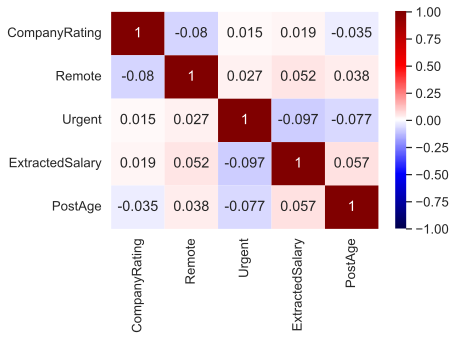

In [174]:
heat_map = sns.heatmap(DF.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [178]:
plt.savefig('C:/Users/New User/Documents/GitHub/NBM_Regression_Student/correlation.pdf')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='CompanyRating', ylabel='ExtractedSalary'>

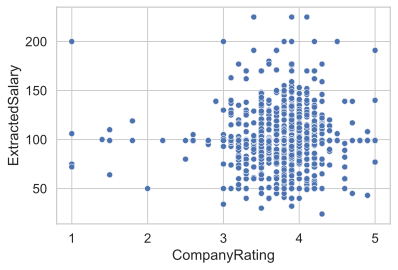

In [180]:
sns.scatterplot(data=DF, x="CompanyRating", y="ExtractedSalary")

<AxesSubplot:xlabel='PostAge', ylabel='ExtractedSalary'>

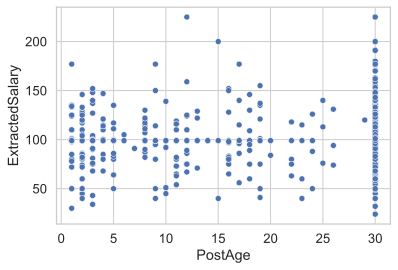

In [181]:
sns.scatterplot(data=DF, x="PostAge", y="ExtractedSalary")

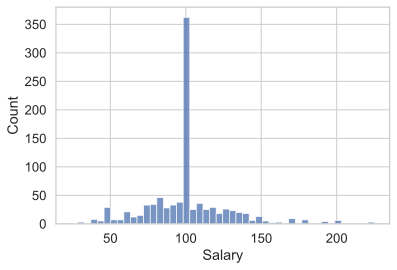

In [185]:
x = pd.Series(DF.ExtractedSalary, name="Salary")
ax = sns.histplot(x)

In [186]:
DF.ExtractedSalary.max()

225.0

In [213]:
DF_train = DF[['ExtractedSalary', 'CompanyRating', 'PostAge']].copy()

In [214]:
DF_train

ExtractedSalary  CompanyRating  PostAge
JobNum                                         
0                  96.0            4.3     30.0
1                  63.0            3.8     22.0
2                  82.0            3.2     30.0
3                  40.0            3.6     30.0
4                 110.0            3.9      1.0
...                 ...            ...      ...
986               225.0            3.9     30.0
987               113.0            3.9     30.0
988                99.0            3.5     30.0
989                50.0            3.8      9.0
990               101.0            4.1     30.0

[962 rows x 3 columns]

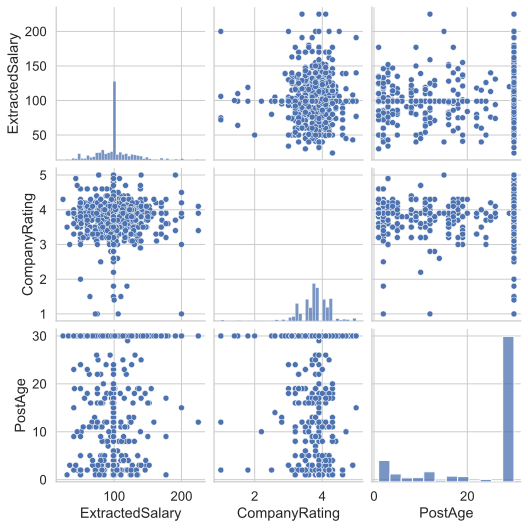

In [215]:
sns.pairplot(DF_train);

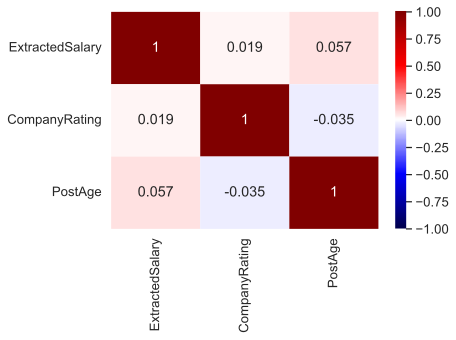

In [218]:
sns.heatmap(DF_train.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [3]:
DF_train

NameError: name 'DF_train' is not defined

In [4]:
DF_train = pd.read_csv("C:/Users/New User/Documents/GitHub/NBM_Regression_Student/nyc_sci_DF.csv")

In [5]:
DF_train

JobNum        JobTitle                             Company  \
0         0  Data Scientist                             Spotify   
1         1  Data Scientist              NYC Health + Hospitals   
2         2  Data Scientist                          CVS Health   
3         3  Data Scientist  VISITING NURSE SERVICE OF NEW YORK   
4         4  Data Scientist                              PayPal   
..      ...             ...                                 ...   
957     986  Data Scientist                    Capital One - US   
958     987  Data Scientist                                KPMG   
959     988  Data Scientist        Amazon Dev Center U.S., Inc.   
960     989  Data Scientist                                  BD   
961     990  Data Scientist                               Merck   

                                              Location  CompanyRating  \
0                                  New York, NY•Remote            4.3   
1    New York, NY 10004 (Financial District area)+3...            3.8   
2                             New York, NY+4 locations            3.2   
3                                        Manhattan, NY            3.6   
4                    New York, NY 10013 (Tribeca area)            3.9   
..                                                 ...            ...   
957                 New York, NY 10011 (Flatiron area)            3.9   
958                            New York, NY+1 location            3.9   
959                                       New York, NY            3.5   
960                    New York, NY+2 locations•Remote            3.8   
961                                     Kenilworth, NJ            4.1   

                              Salary  Remote  Urgent EasilyApply  \
0    Estimated $96.1K – $122K a year       1       0           1   
1          $63,926 - $120,000 a year       1       0           1   
2            $82,400 a yearFull-time       1       0           0   
3          $40,883 - $135,440 a year       1       0           0   
4                $110 - $130 an hour       1       1           1   
..                               ...     ...     ...         ...   
957   Estimated $225K – $285K a year       1       0           0   
958   Estimated $113K – $143K a year       1       0           0   
959                        Full-time       1       0           0   
960                     Part-time +2       1       0           1   
961   Estimated $101K – $128K a year       0       0           0   

                   PostedDate ExtractDate  ExtractedSalary  PostAge  
0          Posted30+ days ago  2022-01-23             96.0     30.0  
1           Posted22 days ago  2022-01-23             63.0     22.0  
2                 PostedToday  2022-01-23             82.0     30.0  
3          Posted30+ days ago  2022-01-23             40.0     30.0  
4    EmployerActive 1 day ago  2022-01-23            110.0      1.0  
..                        ...         ...              ...      ...  
957        Posted30+ days ago  2022-01-23            225.0     30.0  
958        Posted30+ days ago  2022-01-23            113.0     30.0  
959        Posted30+ days ago  2022-01-23             99.0     30.0  
960          Posted9 days ago  2022-01-23             50.0      9.0  
961        Posted30+ days ago  2022-01-23            101.0     30.0  

[962 rows x 13 columns]

In [7]:
DF_train = DF_train[['ExtractedSalary', 'CompanyRating', 'PostAge']].copy()

In [8]:
DF_train

ExtractedSalary  CompanyRating  PostAge
0               96.0            4.3     30.0
1               63.0            3.8     22.0
2               82.0            3.2     30.0
3               40.0            3.6     30.0
4              110.0            3.9      1.0
..               ...            ...      ...
957            225.0            3.9     30.0
958            113.0            3.9     30.0
959             99.0            3.5     30.0
960             50.0            3.8      9.0
961            101.0            4.1     30.0

[962 rows x 3 columns]

In [9]:

from sklearn.metrics import median_absolute_error as medae
from sklearn.model_selection import train_test_split

In [10]:
DF_train.shape

(962, 3)

In [11]:
DF_model = DF_train[DF_train.PostAge < 30.0]
DF_model

ExtractedSalary  CompanyRating  PostAge
1               63.0            3.8     22.0
4              110.0            3.9      1.0
6              135.0            3.2     19.0
7               99.0            4.1     11.0
12             110.0            4.0      2.0
..               ...            ...      ...
940            139.0            4.7     10.0
945             60.0            4.6      2.0
955            150.0            3.8      9.0
956             99.0            3.0      3.0
960             50.0            3.8      9.0

[294 rows x 3 columns]

<BarContainer object of 294 artists>

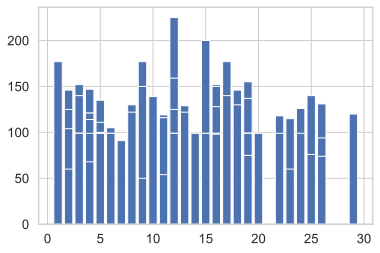

In [13]:
plt.bar(x=DF_model.PostAge, height=DF_model.ExtractedSalary)

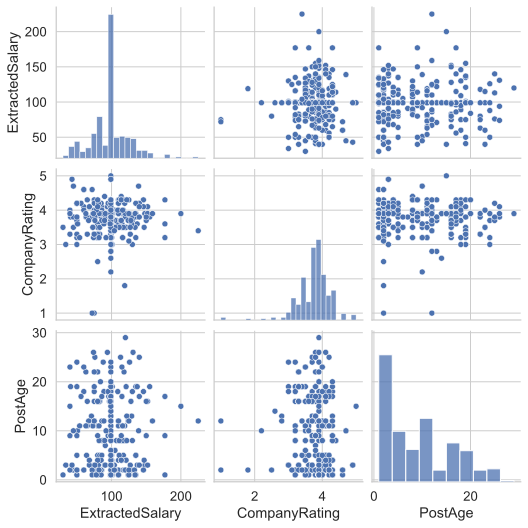

In [14]:
sns.pairplot(DF_model)

In [15]:
DF_model = DF_train[DF_train.ExtractedSalary < 200]
DF_model

ExtractedSalary  CompanyRating  PostAge
0               96.0            4.3     30.0
1               63.0            3.8     22.0
2               82.0            3.2     30.0
3               40.0            3.6     30.0
4              110.0            3.9      1.0
..               ...            ...      ...
956             99.0            3.0      3.0
958            113.0            3.9     30.0
959             99.0            3.5     30.0
960             50.0            3.8      9.0
961            101.0            4.1     30.0

[953 rows x 3 columns]

In [16]:
DF_model = DF_train[DF_train.PostAge < 30]
DF_model

ExtractedSalary  CompanyRating  PostAge
1               63.0            3.8     22.0
4              110.0            3.9      1.0
6              135.0            3.2     19.0
7               99.0            4.1     11.0
12             110.0            4.0      2.0
..               ...            ...      ...
940            139.0            4.7     10.0
945             60.0            4.6      2.0
955            150.0            3.8      9.0
956             99.0            3.0      3.0
960             50.0            3.8      9.0

[294 rows x 3 columns]

In [20]:
DF_model = DF_model[DF_model.ExtractedSalary < 150]
DF_model

ExtractedSalary  CompanyRating  PostAge
0               96.0            4.3     30.0
1               63.0            3.8     22.0
2               82.0            3.2     30.0
3               40.0            3.6     30.0
4              110.0            3.9      1.0
..               ...            ...      ...
956             99.0            3.0      3.0
958            113.0            3.9     30.0
959             99.0            3.5     30.0
960             50.0            3.8      9.0
961            101.0            4.1     30.0

[920 rows x 3 columns]

In [33]:
DF_model = DF_model[DF_model.PostAge < 30]
DF_model

ExtractedSalary  CompanyRating  PostAge
1               63.0            3.8     22.0
4              110.0            3.9      1.0
6              135.0            3.2     19.0
7               99.0            4.1     11.0
12             110.0            4.0      2.0
..               ...            ...      ...
936            104.0            3.4      2.0
940            139.0            4.7     10.0
945             60.0            4.6      2.0
956             99.0            3.0      3.0
960             50.0            3.8      9.0

[283 rows x 3 columns]

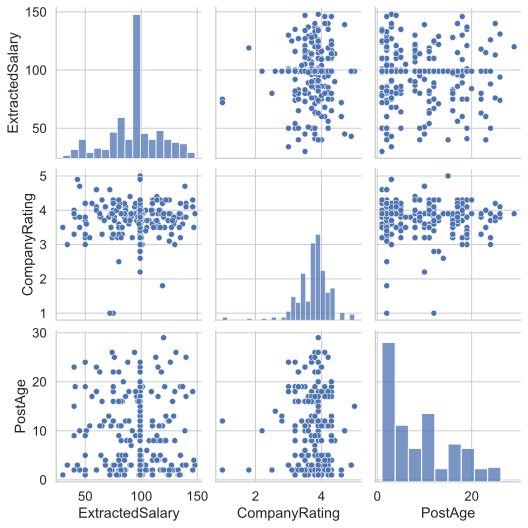

In [22]:
sns.pairplot(DF_model)

In [23]:
DF_model.corr()

ExtractedSalary  CompanyRating   PostAge
ExtractedSalary         1.000000       0.045765 -0.020991
CompanyRating           0.045765       1.000000 -0.071288
PostAge                -0.020991      -0.071288  1.000000

In [24]:
df_train, df_val = train_test_split(DF_model, test_size=.2, random_state=5)
print(df_train.shape)
print(df_val.shape)

(226, 3)
(57, 3)


In [25]:
lr = LinearRegression()
lr.fit(df_train[['CompanyRating','PostAge']], df_train['ExtractedSalary'])

y_pred = lr.predict(df_train[['CompanyRating','PostAge']])
print('Median absolute error for training data is: ' + str(medae(df_train['ExtractedSalary'], y_pred)))

#df_test = pd.read_csv('data/1_test.csv')

y_pred_2 = lr.predict(df_val[['CompanyRating','PostAge']])
print('Median absolute error for validation data is: ' + str(medae(df_val['ExtractedSalary'], y_pred_2)))

Median absolute error for training data is: 12.73013918445929
Median absolute error for validation data is: 13.82897914793729


In [32]:
lr_two = LinearRegression()
X = DF_model[['CompanyRating', 'PostAge']] 
y = DF_model.ExtractedSalary
lr_two.fit(X, y) 
r_squared = lr.score(X, y)
r_squared

-0.0013616606989579338